# Haberman Dataset
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Feature Information

Age : Age of Patients at the time of Operation
Year : Year of Operation
Nodes : No of positive auxiliary Nodes detected in the patient
Status : 1 - Patient survived 5 years or longer
         2 - Patient died within 5 years

Objective : Perform Data analysis on the data to gain insight about predicting patients survival chances of more than 5 years based on age, year of operation and the no of positive auxiliary nodes detected in patient.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings 
warnings.filterwarnings("ignore")

haberman = pd.read_csv("haberman.csv")

# (1) High Level Statistic

In [2]:
print (haberman.shape)

(306, 4)


In [3]:
print (haberman.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [4]:
haberman["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

In [5]:
print(haberman.describe())

              age        year       nodes      status
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


In [6]:
haberman_1 = haberman.loc[haberman["status"] == 1];
haberman_2 = haberman.loc[haberman["status"] == 2];
print("Patients survivng more than 5 years")
print(haberman_1.describe())
print("\nPatients survivng less than 5 years")
print(haberman_2.describe())

Patients survivng more than 5 years
              age        year       nodes  status
count  225.000000  225.000000  225.000000   225.0
mean    52.017778   62.862222    2.791111     1.0
std     11.012154    3.222915    5.870318     0.0
min     30.000000   58.000000    0.000000     1.0
25%     43.000000   60.000000    0.000000     1.0
50%     52.000000   63.000000    0.000000     1.0
75%     60.000000   66.000000    3.000000     1.0
max     77.000000   69.000000   46.000000     1.0

Patients survivng less than 5 years
             age       year      nodes  status
count  81.000000  81.000000  81.000000    81.0
mean   53.679012  62.827160   7.456790     2.0
std    10.167137   3.342118   9.185654     0.0
min    34.000000  58.000000   0.000000     2.0
25%    46.000000  59.000000   1.000000     2.0
50%    53.000000  63.000000   4.000000     2.0
75%    61.000000  65.000000  11.000000     2.0
max    83.000000  69.000000  52.000000     2.0


Observation
    - This data is unbalanced dataset.We have 225 datapoints of people who survived for more than 5 years and 81 of who did not
    - Age of patients range from 30 to 83.
    - Operations were done in 12 year range from 1958 to 1969
    - The detected positive auxiliary nodes range from 0 to 52.
    - Mean of age of people survivng more than 5 years is 1.6 years less than people who died whithin 5 years.
    - 75% of people who had survived more than 5 years had detected nodes less than 4.

# (2) Univariate Analysis

## (2.1) Histogram

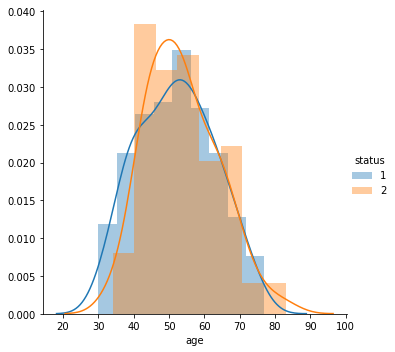

In [7]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.show();



Observation
    - People between age 30 to 40 have considerably higher chance of survving more than 5 years than rest of the people.
    - People of age group 40-50 have lower chance of surviving more than 5 years.

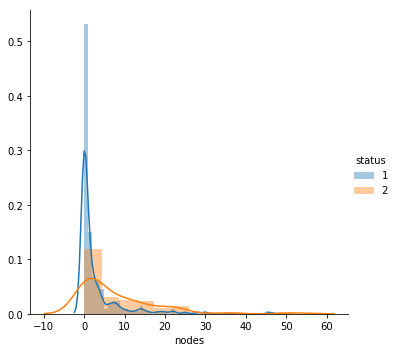

In [8]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.show();

Observation
    - When detected positive auxiliary nodes are near 0, there is a considerably higher chance of survivng more than 5 years, than people who have been detected with high number of positivve auziliary nodes

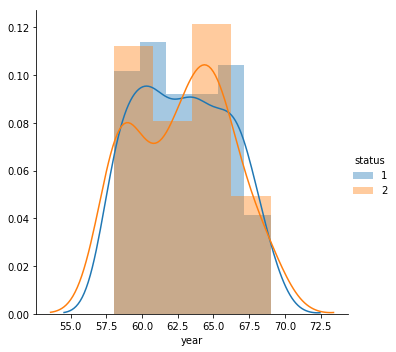

In [9]:
sns.FacetGrid(haberman, hue="status", height=5) \
   .map(sns.distplot, "year") \
   .add_legend();
plt.show();


Observstion
    - People who had operation done in from 1958 to 1962 to had slightly higher chance of surviving more than 5 years.
    - While people who had from 1962 to 1966 have slighly higher chance of dying within 5 years. 

## (2.2) PDF & CDF

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


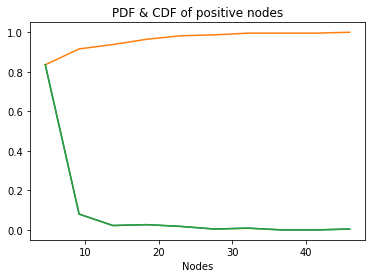

In [10]:
# PDF and CDF of Nodes
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
plt.title('PDF & CDF of positive nodes')
plt.xlabel('Nodes')
'''
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))
'''
counts, bin_edges = np.histogram(haberman_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);

plt.show();


Observation
    - Most of the patients have detected nodes less than 10.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


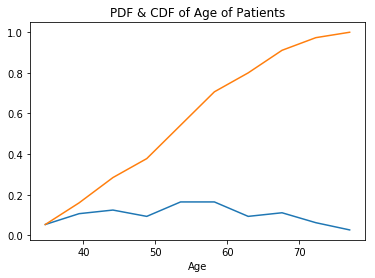

In [11]:
# PDF and CDF of Age

counts, bin_edges = np.histogram(haberman_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('PDF & CDF of Age of Patients')
plt.xlabel('Age')

plt.show();



[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


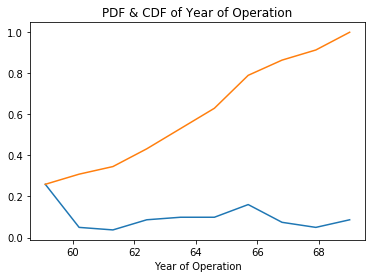

In [12]:
# PDF and CDF of Year of Operation
counts, bin_edges = np.histogram(haberman_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.title('PDF & CDF of Year of Operation')
plt.xlabel('Year of Operation')

plt.show();

## (2.3) Box Plot with Whiskers

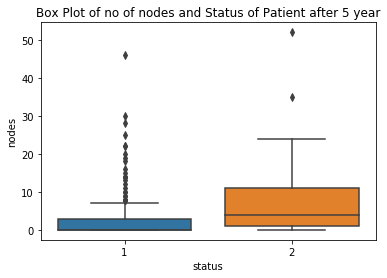

In [13]:
sns.boxplot(x='status',y='nodes', data=haberman).set_title('Box Plot of no of nodes and Status of Patient after 5 year')
plt.show()

Observation
    - More than 75% of people who survived for more than 5 years had detected nodes less than 3.
    - While 50% of people who died within 5 years had detected nodes more than 4.
    - Though most of people who survive more than 5 years have generally few detected node. There are many outlier cases where people with high no of detected nodes have survive more than 5 years.

## (2.5) Box Plot

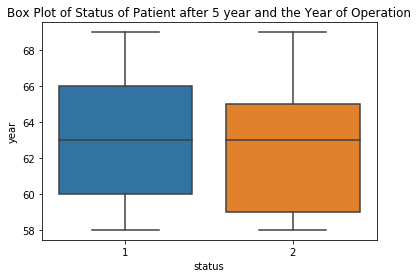

In [14]:
sns.boxplot(x='status',y='year', data=haberman).set_title('Box Plot of Status of Patient after 5 year and the Year of Operation')
plt.show()

Observation
    - People who have operation done before 1960 have higher chance of surviving less than 5 years. While people who had operation after 1965 have higher chance of survival more than 5 years.

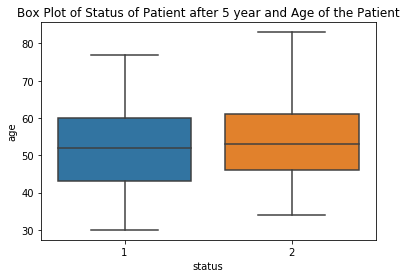

In [15]:
sns.boxplot(x='status',y='age', data=haberman).set_title('Box Plot of Status of Patient after 5 year and Age of the Patient')
plt.show()

Observation
    - People less than 52 have higher chance of surviving more than 5 years.

## (2.5) Violin plots

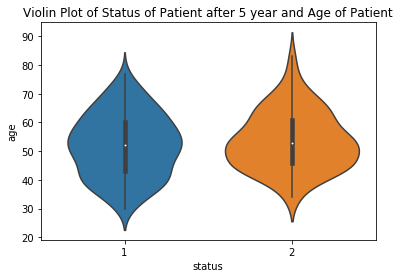

In [16]:
sns.violinplot(x="status", y="age", data=haberman, size=8).set_title('Violin Plot of Status of Patient after 5 year and Age of Patient')
plt.show()

Observation
    - People around the age of 50 have much higher chance of not survivng more than 5 years.

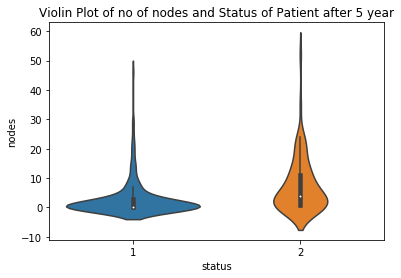

In [17]:

sns.violinplot(x="status", y="nodes", data=haberman, size=8).set_title('Violin Plot of no of nodes and Status of Patient after 5 year')
plt.show()

Observstion
    - There is very high chance of people survivng more than 5 years when they detected nodes around 0.

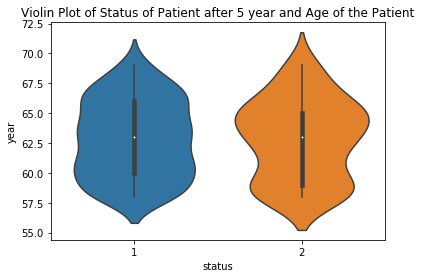

In [18]:
sns.violinplot(x="status", y="year", data=haberman, size=8).set_title('Violin Plot of Status of Patient after 5 year and Age of the Patient')
plt.show()

# (3) Bivariate Analysis

## (3.1) 2-D Scatter Plot

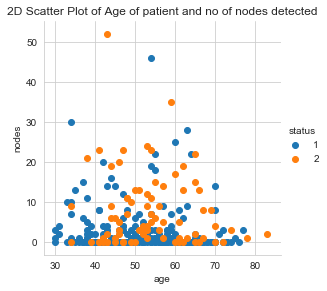

In [19]:
sns.set_style("whitegrid")
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "nodes") \
   .add_legend();
plt.title("2D Scatter Plot of Age of patient and no of nodes detected")
plt.show();


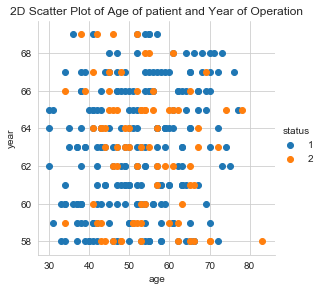

In [20]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "age", "year") \
   .add_legend();
plt.title("2D Scatter Plot of Age of patient and Year of Operation")
plt.show();

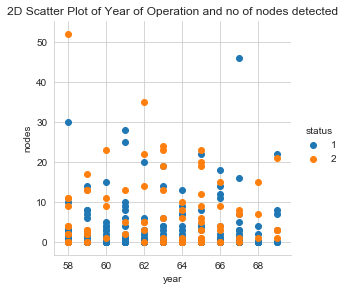

In [21]:
sns.set_style("whitegrid");
sns.FacetGrid(haberman, hue="status", height=4) \
   .map(plt.scatter, "year", "nodes") \
   .add_legend();
plt.title("2D Scatter Plot of Year of Operation and no of nodes detected")
plt.show();

## (3.2) Pair Plots

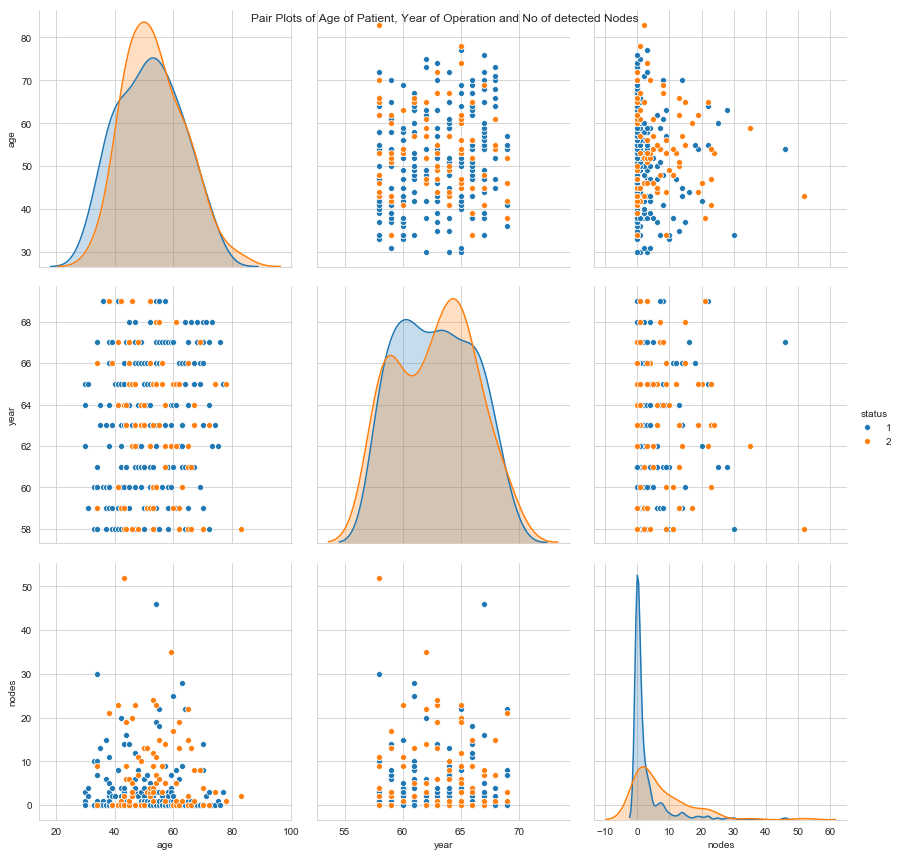

In [22]:
a=sns.pairplot(haberman,vars=["age", "year", "nodes"], hue="status", height=4);
a.fig.suptitle("Pair Plots of Age of Patient, Year of Operation and No of detected Nodes")
plt.show()

Observation
    - There is heavy overlapping making it difficult to make any clear distiction between survival status of people of after 5 years based on age, year of operation and no of nodes detected 

# (4) Mean, Variance and Std-dev

In [23]:
#Mean, Variance, Std-deviation,  
print("\nNode Means:")
print(np.mean(haberman_1["nodes"]))
print(np.mean(haberman_2["nodes"]))

print("\nAge Means:")
print(np.mean(haberman_1["age"]))
print(np.mean(haberman_2["age"]))

print("\nYear Means:")
print(np.mean(haberman_1["year"]))
print(np.mean(haberman_2["year"]))

print("\nStd-dev nodes:");
print(np.std(haberman_1["nodes"]))
print(np.std(haberman_2["nodes"]))

print("\nStd-dev Age:");
print(np.std(haberman_1["age"]))
print(np.std(haberman_2["age"]))

print("\nStd-dev Year:");
print(np.std(haberman_1["year"]))
print(np.std(haberman_2["year"]))



Node Means:
2.7911111111111113
7.45679012345679

Age Means:
52.01777777777778
53.67901234567901

Year Means:
62.86222222222222
62.82716049382716

Std-dev nodes:
5.857258449412131
9.128776076761632

Std-dev Age:
10.98765547510051
10.10418219303131

Std-dev Year:
3.2157452144021956
3.3214236255207883


Observation
    - The people who survive more than 5 years have considerably less no of nodes detected than people who did not survive after 5 years.

In [24]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians nodes:")
print(np.median(haberman_1["nodes"]))
print(np.median(haberman_2["nodes"]))


print("\nQuantiles nodes:")
print(np.percentile(haberman_1["nodes"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["nodes"],np.arange(0, 100, 25)))

print("\n90th Percentiles nodes:")
print(np.percentile(haberman_1["nodes"],90))
print(np.percentile(haberman_2["nodes"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation nodes")
print(robust.mad(haberman_1["nodes"]))
print(robust.mad(haberman_2["nodes"]))


Medians nodes:
0.0
4.0

Quantiles nodes:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentiles nodes:
8.0
20.0

Median Absolute Deviation nodes
0.0
5.930408874022408


Observation
    - More than 50 % of people who survived more than 5 years have no nodes detected
    - More than 75 % of people who did not survive more than 5 years had atleast 1 node detected.    

In [25]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians age:")
print(np.median(haberman_1["age"]))
print(np.median(haberman_2["age"]))


print("\nQuantiles age:")
print(np.percentile(haberman_1["age"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles age:")
print(np.percentile(haberman_1["age"],90))
print(np.percentile(haberman_2["age"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation age")
print(robust.mad(haberman_1["age"]))
print(robust.mad(haberman_2["age"]))


Medians age:
52.0
53.0

Quantiles age:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles age:
67.0
67.0

Median Absolute Deviation age
13.343419966550417
11.860817748044816


In [26]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians year:")
print(np.median(haberman_1["year"]))
print(np.median(haberman_2["year"]))


print("\nQuantiles year:")
print(np.percentile(haberman_1["year"],np.arange(0, 100, 25)))
print(np.percentile(haberman_2["year"],np.arange(0, 100, 25)))

print("\n90th Percentiles year:")
print(np.percentile(haberman_1["year"],90))
print(np.percentile(haberman_2["year"],90))

from statsmodels import robust
print ("\nMedian Absolute Deviation year")
print(robust.mad(haberman_1["year"]))
print(robust.mad(haberman_2["year"]))


Medians year:
63.0
63.0

Quantiles year:
[58. 60. 63. 66.]
[58. 59. 63. 65.]

90th Percentiles year:
67.0
67.0

Median Absolute Deviation year
4.447806655516806
4.447806655516806


# (5) Conclusion

    - It is difficult to classify the data as there is heavy overlapping of data of survial status based on all 3 parameters, ie age, year of operation and no of detected auxiliary nodes.
    - People who have detected auxiliary nodes around 0-3 have much higher chance of surviving more than 5 years. 
    - Youngest people in the sample population have higher chance of surviving more than 5 years.
    - People of age group 40-50 have lower chance of surviving more than 5 years.
    - Higher the no of detected auxiliary nodes, lower the chance of survving more than 5 years. 
    - The people who have been operated after 1965 have higher chance of surviving more than 5 years than people who had operation done before 1960.